In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# the stocks comapnys for analysis
comp_names = ["11B", "CDR"]

# load OLHC data
data = pd.read_csv("./webscraping/olhc.csv", sep=',')
del data["naked_model"]
del data["model_bid"]
del data["model_ask"]
# clean data

# transform string to floats
transform_string = lambda x: x.replace(" ", "").replace(",", ".")
data["close"] = data['close'].transform(transform_string).astype(np.float32, errors='raise')
data["open"] = data['open'].transform(transform_string).astype(np.float32, errors='raise')
data["delta"] = data['delta'].transform(transform_string).astype(np.float32, errors='raise')
data["max"] = data['max'].transform(transform_string).astype(np.float32, errors='raise')
data["min"] = data['min'].transform(transform_string).astype(np.float32, errors='raise')
data["turnover"] = data['turnover'].transform(transform_string).astype(np.float32, errors='raise')
data = data.loc[data["ticker"].isin(comp_names)]

# Explor the data

In [3]:
data.tail(10)

,id,ticker,issuer,session_date,isin,currency,open,max,min,close,delta,volumen,transactions_no,turnover
196433,196434,CDR,CD Projekt SA,11.01.2021,PLOPTTC00011,PLN,240.000000,257.000000,240.000000,246.000000,2.54,795943,17609,198409.703125
196434,196435,CDR,CD Projekt SA,12.01.2021,PLOPTTC00011,PLN,246.000000,252.899994,243.000000,248.500000,1.02,656346,12992,162244.796875
196435,196436,CDR,CD Projekt SA,13.01.2021,PLOPTTC00011,PLN,248.500000,253.500000,247.100006,249.899994,0.56,654826,12531,163604.000000
196436,196437,CDR,CD Projekt SA,14.01.2021,PLOPTTC00011,PLN,253.399994,277.100006,251.300003,265.000000,6.04,1285147,24235,339000.812500
196437,196438,CDR,CD Projekt SA,15.01.2021,PLOPTTC00011,PLN,265.000000,267.200012,251.100006,256.200012,-3.32,760614,15605,196083.796875
196438,196439,CDR,CD Projekt SA,18.01.2021,PLOPTTC00011,PLN,257.000000,258.200012,249.300003,253.500000,-1.05,480233,9693,121280.296875
196439,196440,CDR,CD Projekt SA,19.01.2021,PLOPTTC00011,PLN,255.300003,257.000000,242.800003,248.199997,-2.09,752443,14728,186521.593750
196440,196441,CDR,CD Projekt SA,20.01.2021,PLOPTTC00011,PLN,247.000000,255.699997,239.000000,252.699997,1.81,741544,13868,183195.000000
196441,196442,CDR,CD Projekt SA,21.01.2021,PLOPTTC00011,PLN,255.000000,260.500000,251.600006,253.199997,0.20,901494,14557,231128.296875
196442,196443,CDR,CD Projekt SA,22.01.2021,PLOPTTC00011,PLN,252.000000,257.000000,249.899994,250.100006,-1.22,519925,10060,131020.898438


## Summary Statistics for CD Projekt SA

In [4]:
_11B = data.loc[data["ticker"]==comp_names[0]]
CDR = data.loc[data["ticker"]==comp_names[1]]

company_list = [_11B, CDR]

# reset index
CDR.index = range(len(CDR.index))

# describe statisticks
CDR.describe()

,id,open,max,min,close,delta,volumen,transactions_no,turnover
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2.007000e+03,2007.000000,2.007000e+03
mean,195440.000000,112.844940,114.863289,110.707664,112.817940,0.212461,2.877832e+05,3038.198306,4.293623e+04
std,579.515315,119.257713,121.489433,116.928932,119.159637,2.507571,3.534993e+05,5786.615916,9.044283e+04
min,194437.000000,6.220000,6.350000,6.100000,6.230000,-13.900000,5.845000e+03,47.000000,5.443000e+01
25%,194938.500000,17.600000,17.790001,17.325000,17.570001,-1.055000,1.214995e+05,480.500000,2.849575e+03
50%,195440.000000,54.009998,55.490002,53.250000,54.450001,0.080000,2.041220e+05,1368.000000,1.123020e+04
75%,195941.500000,191.000000,194.049995,187.050003,190.050003,1.475000,3.339185e+05,3502.500000,4.900868e+04
max,196443.000000,455.299988,464.200012,443.799988,460.799988,20.469999,6.416313e+06,103776.000000,1.477540e+06


In [5]:
CDR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2007 non-null   int64  
 1   ticker           2007 non-null   object 
 2   issuer           2007 non-null   object 
 3   session_date     2007 non-null   object 
 4   isin             2007 non-null   object 
 5   currency         2007 non-null   object 
 6   open             2007 non-null   float32
 7   max              2007 non-null   float32
 8   min              2007 non-null   float32
 9   close            2007 non-null   float32
 10  delta            2007 non-null   float32
 11  volumen          2007 non-null   int64  
 12  transactions_no  2007 non-null   int64  
 13  turnover         2007 non-null   float32
dtypes: float32(6), int64(3), object(5)
memory usage: 172.6+ KB


In [6]:
# plot all companys by selected category
def plot_companys(category):
    plt.figure(figsize=(12, 8))
    plt.subplots_adjust(top=4.2, bottom=2)

    for i, company in enumerate(company_list, 1):
        plt.subplot(len(comp_names), 1, i)
        company[category.lower()].plot()
        plt.ylabel(category)
        plt.xlabel("None")
        plt.title(comp_names[i - 1])

# Plot historical view of the closing price

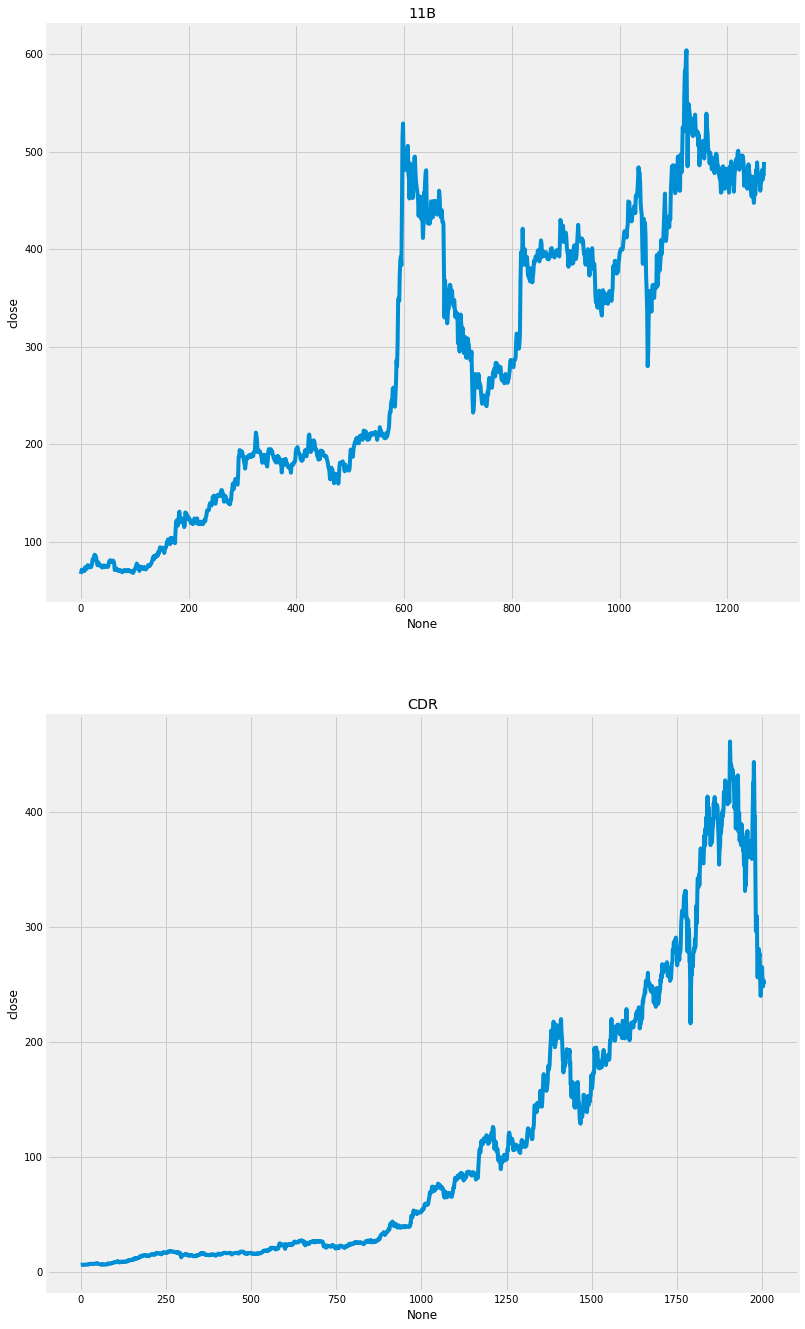

In [7]:
plot_companys("close")

# Plot total volume of stock being traded each day

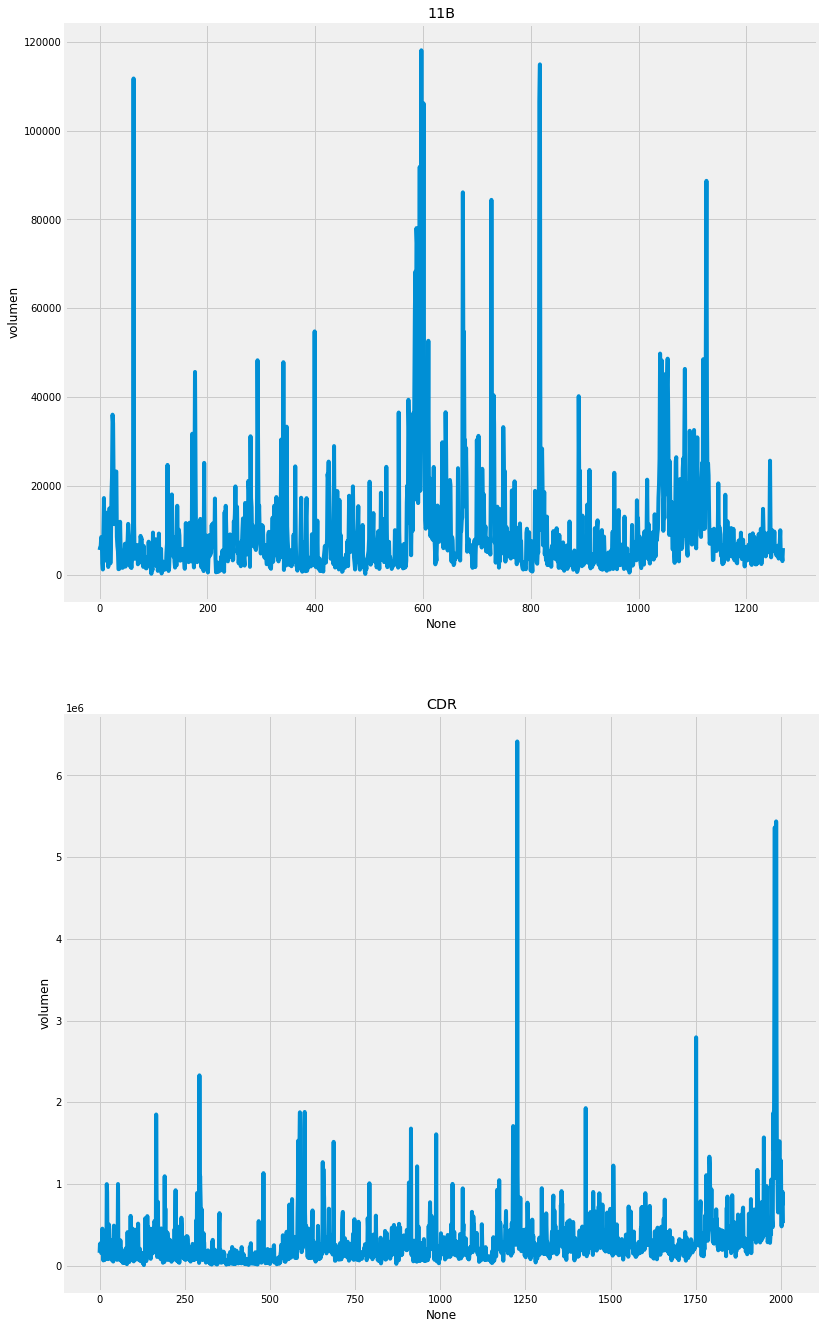

In [8]:
plot_companys("volumen")

# Calculate moving average for stocks

In [9]:
mv_mean = [10, 20, 50]

# calculate moving average for close prices
for mv in mv_mean:
    for company in company_list:
        column = f"Moving Average for {mv} days"
        company[column] = company["close"].rolling(mv).mean()

C:\Users\barla\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Plot moving averages

Text(0.5, 1.0, '11B')

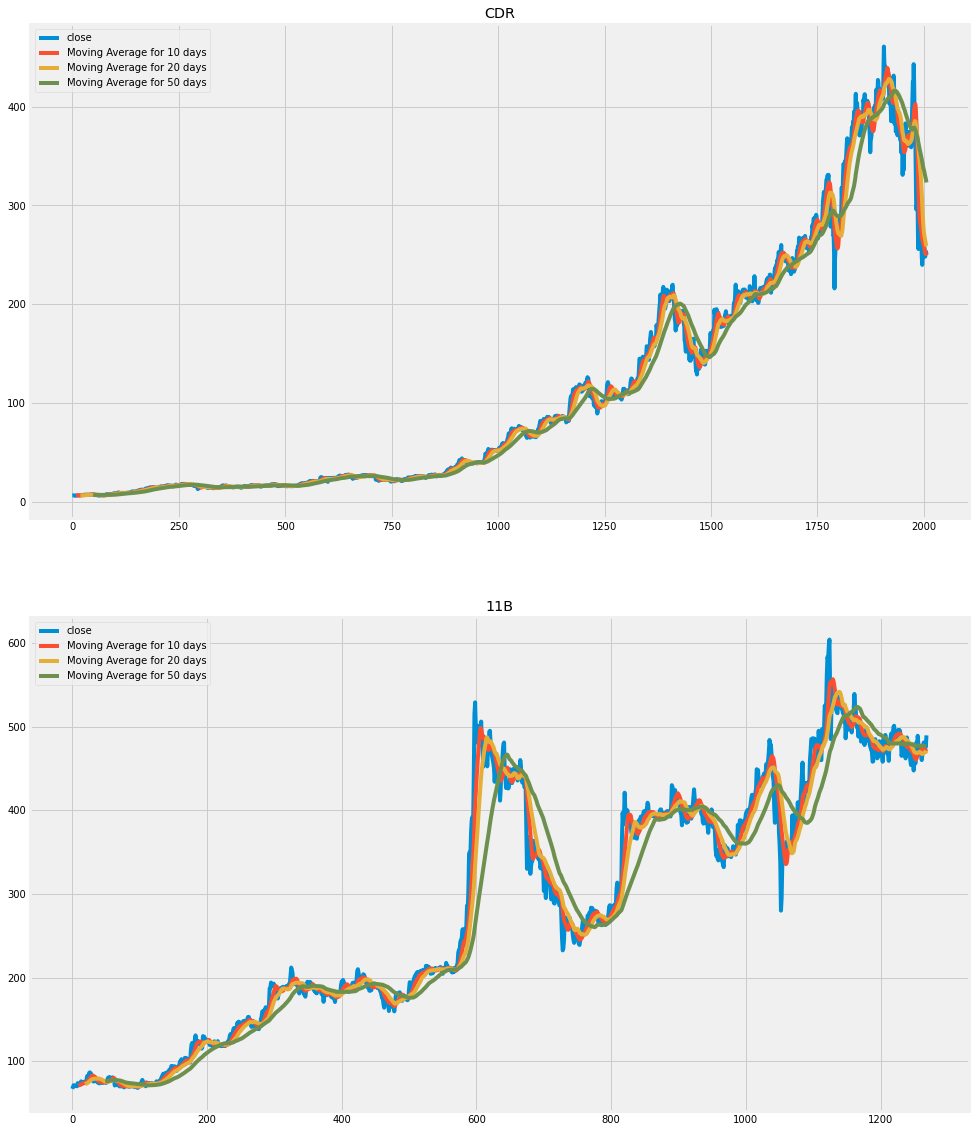

In [10]:
fig, axes= plt.subplots(nrows=2, ncols=1)
fig.set_figheight(20)
fig.set_figwidth(15)

CDR[["close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"]].plot(ax=axes[0])
axes[0].set_title("CDR")

_11B[["close", "Moving Average for 10 days", "Moving Average for 20 days", "Moving Average for 50 days"]].plot(ax=axes[1])
axes[1].set_title("11B")

# Create DataFrame with closing prices

In [11]:
CDR_close = CDR.loc[1000:, "close"]
CDR_close.index = range(len(CDR_close.index))

_11B_close = _11B.loc[262:, "close"]
_11B_close.index = range(len(_11B_close.index))

d = {"CDR": CDR_close, "11B": _11B_close}
close_stocks = pd.DataFrame(data=d)

# Now we have closing prices from last 1000 days

In [12]:
close_stocks.tail()

,CDR,11B
1002,253.500000,481.0
1003,248.199997,471.0
1004,252.699997,478.0
1005,253.199997,475.5
1006,250.100006,489.5


# Calculate daily return of the stocks

In [13]:
close_return = close_stocks.pct_change()

In [14]:
close_return.tail()

,CDR,11B
1002,-0.010539,0.016913
1003,-0.020907,-0.020790
1004,0.018131,0.014862
1005,0.001979,-0.005230
1006,-0.012243,0.029443


### Let's check the correlation between the daily returns using seaborn pairplot function

c:\users\barla\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


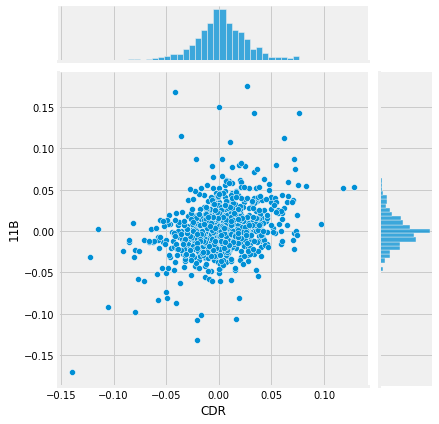

In [15]:
import seaborn as sns

sns.jointplot("CDR", "11B", close_return, kind="scatter")

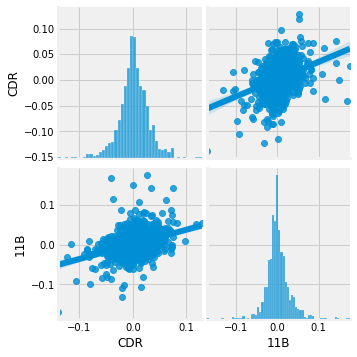

In [16]:
sns.pairplot(close_return, kind="reg")

## By the glance of an eye we can see that the prices of daily returns are not correlated to each other

<AxesSubplot:>

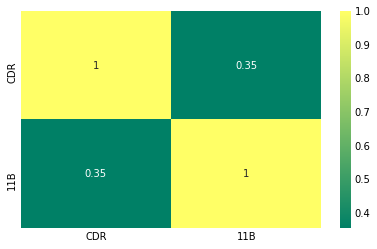

In [17]:
sns.heatmap(close_return.corr(), annot=True, cmap="summer")

## By calcualting correlation plot we see that the correlation is 0.35 which is low

<AxesSubplot:>

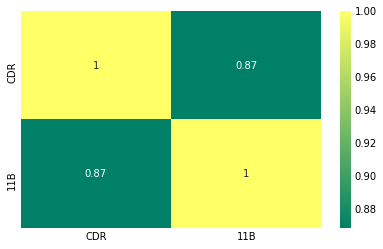

In [18]:
sns.heatmap(close_stocks[["CDR", "11B"]].corr(), annot=True, cmap="summer")

We can see that the stocks prices of 11Bit and CD Projekt SA are positivley correlated with each other a linear relationship between it's daily prices should occur.

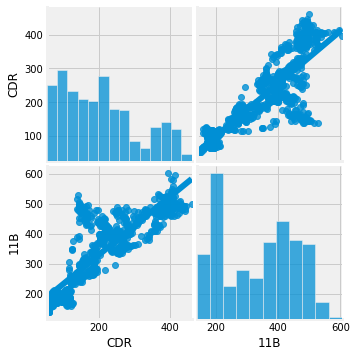

In [19]:
sns.pairplot(close_stocks[["CDR", "11B"]], kind="reg")

### There are many ways to quantify risk, one of the most basic ways is by comparing the expected return with the sntandard deviation of the daily returns

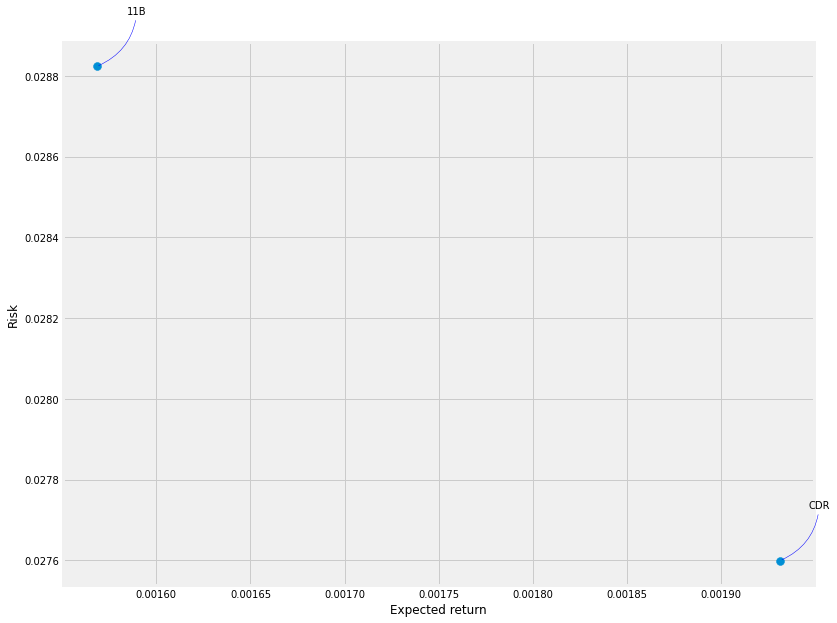

In [20]:
area = np.pi*20
mean_close = close_return.mean()
std_close = close_return.std()

plt.figure(figsize=(12, 10))
plt.scatter(mean_close, std_close, s=area)
plt.xlabel("Expected return")
plt.ylabel("Risk")

for label, x, y in zip(close_return.columns, mean_close, std_close):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

By looking at the plot we can say, that CDR is better option then 11B

# Predicting the price stock of CDR

In [21]:
CDR_pred = CDR[["close"]]

In [22]:
CDR_pred.tail()

,close
2002,253.500000
2003,248.199997
2004,252.699997
2005,253.199997
2006,250.100006


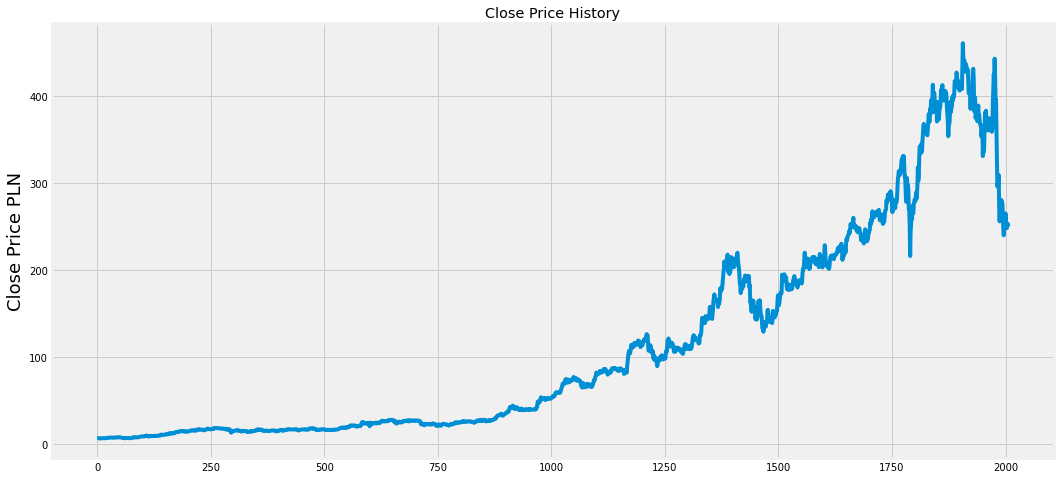

In [23]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(CDR_pred['close'])
plt.ylabel('Close Price PLN', fontsize=18)
plt.show()

In [24]:
# Convert data to numpy array
pred_data = CDR_pred.values

## Scale the data

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(pred_data)

# get the number of rows to train the model
train_data_len = int(np.ceil(len(train_scaled)* 0.95))

train_data_len

1907

In [26]:
# create the training data set
train_data = train_scaled[0:train_data_len, :]
# split the data
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
        
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create the test data set
test_data = train_scaled[train_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = pred_data[train_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

### Create and train the LSTM model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1847/1847 [==============================] - 32s 16ms/step - loss: 0.0044 - root_mean_squared_error: 0.0574


Predict the prices and calculate the mean squared error

In [38]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# mean squar error
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

23.333868

### Plot the real and predicted data

C:\Users\barla\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


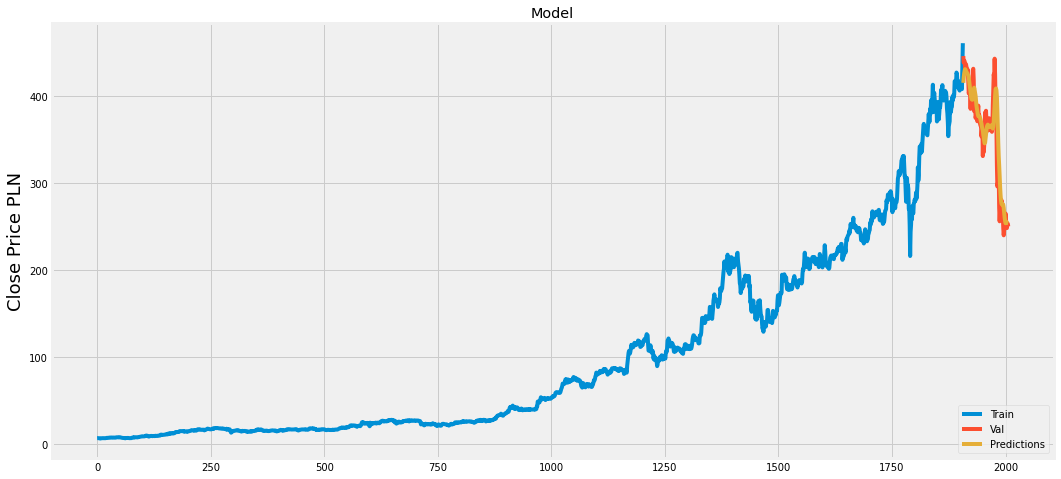

In [39]:
# Plot the data
train = CDR_pred[:train_data_len]
valid = CDR_pred[train_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.ylabel('Close Price PLN', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
valid

,close,Predictions
1907,446.000000,497.446625
1908,438.500000,508.337158
1909,440.700012,512.795715
1910,439.899994,513.513000
1911,430.600006,511.895416
...,...,...
2002,253.500000,288.270264
2003,248.199997,291.233246
2004,252.699997,290.756409
2005,253.199997,289.422577


## Export predictions to csv for Microstructure test

In [48]:
valid.index.name = "CDR"
valid.to_csv("CDR predicted.csv", sep=";", index=True)